# سوال مهم: آیا در پرتفوی خود دلار بخریم یا خیر؟؟؟؟

اجازه دهید بررسی کنیم...

In [1]:
import numpy as np
import pandas as pd
import finpy_tse as tse
import mplfinance as mplf
import scipy.stats as stt
import matplotlib.pyplot as plt
import  mahdi as msj

## دریافت قیمت دلار به ریال

In [100]:
USDIRI = tse.Get_USD_RIAL(
    start_date='1391-01-7',
    end_date='1401-10-14',
    ignore_date=False,
    show_weekday=False,
    double_date=True,
)

In [101]:
USDIRI

,Date,Open,High,Low,Close
J-Date,,,,,
1391-01-07,2012-03-26,19000,19000,19000,19000
1391-01-09,2012-03-28,19200,19200,19200,19200
1391-01-10,2012-03-29,19200,19200,19200,19200
1391-01-14,2012-04-02,19120,19120,19120,19120
1391-01-15,2012-04-03,19000,19000,19000,19000
...,...,...,...,...,...
1401-10-10,2022-12-31,406690,407020,389000,389000
1401-10-11,2023-01-01,386820,397090,379820,393000
1401-10-12,2023-01-02,391440,391590,387320,387590


In [102]:
USDIRI.set_index("Date" , inplace = True)

In [106]:
tickers  = ["folad","shapna","khodro" , "khesapa" ,"famili","ghegol","mellat" , "setran" , "shafan" ]

frame = pd.DataFrame()
for stock_name in tickers:
    stock = pd.read_excel("{}.xlsx".format(stock_name))
    stock.drop( "Unnamed: 0", inplace=True, axis=1)
    stock.drop(index = stock.index[0:6] , inplace=True)
    stock.rename(columns = stock.iloc[0] , inplace = True)
    stock.set_index('تاریخ میلادی' , inplace = True)
    stock = stock.drop(['تاریخ میلادی'] , axis = 0)
    
    df = stock["قیمت تعدیلی"].to_frame()
    df.columns = [stock_name]
    
    df[stock_name] = df[stock_name].replace(['-'], '')
    df[stock_name] = pd.to_numeric(df[stock_name])
    df = df.iloc[::-1]
    df.fillna(method='ffill', inplace=True)
    
    
    frame[stock_name] = df[stock_name]

frame = frame.drop(index = frame.index[0:3])
frame.dropna(inplace = True)
frame = round(frame , 2)

In [107]:
frame

,folad,shapna,khodro,khesapa,famili,ghegol,mellat,setran,shafan
تاریخ میلادی,,,,,,,,,
2012-03-27,71.46,47.84,61.50,66.65,111.12,26.13,72.33,923.19,53.40
2012-03-28,71.57,46.56,60.77,66.72,111.78,26.13,71.87,865.11,55.50
2012-04-02,69.41,46.71,59.76,64.44,109.10,26.13,70.71,867.13,56.43
2012-04-03,68.39,45.70,59.39,62.81,108.55,26.13,69.32,863.10,54.76
2012-04-04,69.39,45.70,59.23,61.97,108.57,26.13,68.62,853.02,57.64
...,...,...,...,...,...,...,...,...,...
2022-12-31,5910.00,7630.00,2864.00,2342.00,7310.00,5970.00,3070.00,33430.00,6020.00
2023-01-01,5920.00,7610.00,2950.00,2374.00,7350.00,5700.00,3025.00,32510.00,5900.00
2023-01-02,5960.00,7740.00,3080.00,2494.00,7460.00,5800.00,3056.00,33120.00,5940.00


In [108]:
frame.index = pd.to_datetime(frame.index)

In [109]:
frame.index

DatetimeIndex(['2012-03-27', '2012-03-28', '2012-04-02', '2012-04-03',
               '2012-04-04', '2012-04-07', '2012-04-08', '2012-04-09',
               '2012-04-10', '2012-04-11',
               ...
               '2022-12-21', '2022-12-24', '2022-12-25', '2022-12-26',
               '2022-12-28', '2022-12-31', '2023-01-01', '2023-01-02',
               '2023-01-03', '2023-01-04'],
              dtype='datetime64[ns]', name='تاریخ میلادی', length=2589, freq=None)

In [110]:
frame["USD"] = USDIRI["Close"]

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\4257152897.py:1: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  frame["USD"] = USDIRI["Close"]


ValueError: cannot reindex on an axis with duplicate labels

ارور میدهد زیرا سطر های دو جدول یکسان نیستند

حال باید چه کنیم؟؟؟

In [111]:
portfolio = pd.read_excel("portfolio.xlsx" , index_col = "Date")
portfolio

""
Date
2012-03-26
2012-03-27
2012-03-28
2012-03-29
2012-03-30
...
2022-12-31
2023-01-01
2023-01-02


In [112]:
portfolio.index

DatetimeIndex(['2012-03-26', '2012-03-27', '2012-03-28', '2012-03-29',
               '2012-03-30', '2012-03-31', '2012-04-01', '2012-04-02',
               '2012-04-03', '2012-04-04',
               ...
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31', '2023-01-01', '2023-01-02',
               '2023-01-03', '2023-01-04'],
              dtype='datetime64[ns]', name='Date', length=3937, freq=None)

In [113]:
stocks = portfolio.join(USDIRI.Close)
stocks

,Close
Date,
2012-03-26,19000.0
2012-03-27,NaN
2012-03-28,19200.0
2012-03-29,19200.0
2012-03-30,NaN
...,...
2022-12-31,389000.0
2023-01-01,393000.0
2023-01-02,387590.0


In [114]:
stocks = stocks.join(frame)

In [125]:
stocks

,IRI/USD,folad,shapna,khodro,khesapa,famili,ghegol,mellat,setran,shafan
2012-03-27,19000.0,71.46,47.84,61.50,66.65,111.12,26.13,72.33,923.19,53.4
2012-03-28,19200.0,71.57,46.56,60.77,66.72,111.78,26.13,71.87,865.11,55.5
2012-03-29,19200.0,71.57,46.56,60.77,66.72,111.78,26.13,71.87,865.11,55.5
2012-03-30,19200.0,71.57,46.56,60.77,66.72,111.78,26.13,71.87,865.11,55.5
2012-03-31,19200.0,71.57,46.56,60.77,66.72,111.78,26.13,71.87,865.11,55.5
...,...,...,...,...,...,...,...,...,...,...
2022-12-31,389000.0,5910.00,7630.00,2864.00,2342.00,7310.00,5970.00,3070.00,33430.00,6020.0
2023-01-01,393000.0,5920.00,7610.00,2950.00,2374.00,7350.00,5700.00,3025.00,32510.00,5900.0
2023-01-02,387590.0,5960.00,7740.00,3080.00,2494.00,7460.00,5800.00,3056.00,33120.00,5940.0
2023-01-03,397530.0,5900.00,7600.00,3170.00,2544.00,7260.00,5550.00,3058.00,32030.00,5900.0


In [115]:
stocks.fillna(method='ffill', inplace=True)

In [116]:
stocks

,Close,folad,shapna,khodro,khesapa,famili,ghegol,mellat,setran,shafan
2012-03-26,19000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-27,19000.0,71.46,47.84,61.50,66.65,111.12,26.13,72.33,923.19,53.4
2012-03-28,19200.0,71.57,46.56,60.77,66.72,111.78,26.13,71.87,865.11,55.5
2012-03-29,19200.0,71.57,46.56,60.77,66.72,111.78,26.13,71.87,865.11,55.5
2012-03-30,19200.0,71.57,46.56,60.77,66.72,111.78,26.13,71.87,865.11,55.5
...,...,...,...,...,...,...,...,...,...,...
2022-12-31,389000.0,5910.00,7630.00,2864.00,2342.00,7310.00,5970.00,3070.00,33430.00,6020.0
2023-01-01,393000.0,5920.00,7610.00,2950.00,2374.00,7350.00,5700.00,3025.00,32510.00,5900.0
2023-01-02,387590.0,5960.00,7740.00,3080.00,2494.00,7460.00,5800.00,3056.00,33120.00,5940.0
2023-01-03,397530.0,5900.00,7600.00,3170.00,2544.00,7260.00,5550.00,3058.00,32030.00,5900.0


In [119]:
stocks.dropna(inplace = True)

In [120]:
stocks

,Close,folad,shapna,khodro,khesapa,famili,ghegol,mellat,setran,shafan
2012-03-27,19000.0,71.46,47.84,61.50,66.65,111.12,26.13,72.33,923.19,53.4
2012-03-28,19200.0,71.57,46.56,60.77,66.72,111.78,26.13,71.87,865.11,55.5
2012-03-29,19200.0,71.57,46.56,60.77,66.72,111.78,26.13,71.87,865.11,55.5
2012-03-30,19200.0,71.57,46.56,60.77,66.72,111.78,26.13,71.87,865.11,55.5
2012-03-31,19200.0,71.57,46.56,60.77,66.72,111.78,26.13,71.87,865.11,55.5
...,...,...,...,...,...,...,...,...,...,...
2022-12-31,389000.0,5910.00,7630.00,2864.00,2342.00,7310.00,5970.00,3070.00,33430.00,6020.0
2023-01-01,393000.0,5920.00,7610.00,2950.00,2374.00,7350.00,5700.00,3025.00,32510.00,5900.0
2023-01-02,387590.0,5960.00,7740.00,3080.00,2494.00,7460.00,5800.00,3056.00,33120.00,5940.0
2023-01-03,397530.0,5900.00,7600.00,3170.00,2544.00,7260.00,5550.00,3058.00,32030.00,5900.0


In [121]:
stocks.rename(columns={"Close": "IRI/USD"} , inplace = True)

In [122]:
stocks

,IRI/USD,folad,shapna,khodro,khesapa,famili,ghegol,mellat,setran,shafan
2012-03-27,19000.0,71.46,47.84,61.50,66.65,111.12,26.13,72.33,923.19,53.4
2012-03-28,19200.0,71.57,46.56,60.77,66.72,111.78,26.13,71.87,865.11,55.5
2012-03-29,19200.0,71.57,46.56,60.77,66.72,111.78,26.13,71.87,865.11,55.5
2012-03-30,19200.0,71.57,46.56,60.77,66.72,111.78,26.13,71.87,865.11,55.5
2012-03-31,19200.0,71.57,46.56,60.77,66.72,111.78,26.13,71.87,865.11,55.5
...,...,...,...,...,...,...,...,...,...,...
2022-12-31,389000.0,5910.00,7630.00,2864.00,2342.00,7310.00,5970.00,3070.00,33430.00,6020.0
2023-01-01,393000.0,5920.00,7610.00,2950.00,2374.00,7350.00,5700.00,3025.00,32510.00,5900.0
2023-01-02,387590.0,5960.00,7740.00,3080.00,2494.00,7460.00,5800.00,3056.00,33120.00,5940.0
2023-01-03,397530.0,5900.00,7600.00,3170.00,2544.00,7260.00,5550.00,3058.00,32030.00,5900.0


### **!حال دیگر داده های ما تمیز تمیز تمیز شد**  

In [123]:
daily_rets = msj.compute_returns(stocks)
daily_rets.dropna(inplace = True)
daily_rets#.tail()

,IRI/USD,folad,shapna,khodro,khesapa,famili,ghegol,mellat,setran,shafan
2012-03-28,0.010526,0.001539,-0.026756,-0.011870,0.001050,0.005940,0.000000,-0.006360,-0.062912,0.039326
2012-03-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-03-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-03-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-04-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2022-12-31,-0.065241,-0.060413,-0.069512,-0.004172,-0.032231,-0.049415,0.006745,-0.055385,-0.038539,-0.059375
2023-01-01,0.010283,0.001692,-0.002621,0.030028,0.013664,0.005472,-0.045226,-0.014658,-0.027520,-0.019934
2023-01-02,-0.013766,0.006757,0.017083,0.044068,0.050548,0.014966,0.017544,0.010248,0.018763,0.006780
2023-01-03,0.025646,-0.010067,-0.018088,0.029221,0.020048,-0.026810,-0.043103,0.000654,-0.032911,-0.006734


In [126]:
daily_rets.index = pd.to_datetime(daily_rets.index)
daily_rets.index

DatetimeIndex(['2012-03-28', '2012-03-29', '2012-03-30', '2012-03-31',
               '2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06',
               ...
               '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-29',
               '2022-12-30', '2022-12-31', '2023-01-01', '2023-01-02',
               '2023-01-03', '2023-01-04'],
              dtype='datetime64[ns]', length=3948, freq=None)

In [127]:
daily_rets = daily_rets.loc["2012" :]

In [128]:
# Annualize returns (periods = 239)
ann_rets = msj.annualize_rets(daily_rets, 239)
round(ann_rets,2)

IRI/USD    0.20
folad      0.31
shapna     0.36
khodro     0.27
khesapa    0.25
famili     0.29
ghegol     0.38
mellat     0.26
setran     0.24
shafan     0.33
dtype: float64

In [129]:
mean_rets = daily_rets.mean()
std_rets  = daily_rets.std()
cov_rets  = daily_rets.cov()
cov_rets

,IRI/USD,folad,shapna,khodro,khesapa,famili,ghegol,mellat,setran,shafan
IRI/USD,0.000264,0.000018,0.000016,0.000010,0.000012,0.000020,0.000024,0.000004,0.000010,0.000007
folad,0.000018,0.000324,0.000161,0.000098,0.000099,0.000207,0.000048,0.000116,0.000098,0.000114
shapna,0.000016,0.000161,0.002055,0.000106,0.000124,0.000135,0.000078,0.000102,0.000113,0.000103
khodro,0.000010,0.000098,0.000106,0.000838,0.000369,0.000092,0.000056,0.000130,0.000143,0.000048
khesapa,0.000012,0.000099,0.000124,0.000369,0.000958,0.000115,0.000084,0.000155,0.000111,0.000065
famili,0.000020,0.000207,0.000135,0.000092,0.000115,0.000368,0.000057,0.000112,0.000099,0.000128
ghegol,0.000024,0.000048,0.000078,0.000056,0.000084,0.000057,0.001043,0.000042,0.000082,0.000029
mellat,0.000004,0.000116,0.000102,0.000130,0.000155,0.000112,0.000042,0.000447,0.000098,0.000065
setran,0.000010,0.000098,0.000113,0.000143,0.000111,0.000099,0.000082,0.000098,0.000520,0.000076
shafan,0.000007,0.000114,0.000103,0.000048,0.000065,0.000128,0.000029,0.000065,0.000076,0.000429


اکنون 4000 پرتفوی را با وزن های تخصیص یافته به سهام فوق شبیه سازی می کنیم:

نکته:

**ابتدا با فرض نرخ بدون ریسک 0 درصد**

In [143]:
periods_per_year = 239
num_portfolios   = 16000
portfolios       = pd.DataFrame(columns=["return","volatility","sharpe ratio","w1","w2","w3","w4","w5","w6","w7","w8","w9","w10"])
risk_free_rate   = 0.0
n_assets = stocks.shape[1]

In [144]:
for i in range(num_portfolios):
    # انتخاب وزن های تصادفی به تعداد دارایی ها
    weights = np.random.random(n_assets)
    # حال جوری تنظیمشان میکنیم که جمعشان 1 شود
    weights /= np.sum(weights)
    
    # بازده سالانه پرتفوی
    ann_rets = msj.annualize_rets(daily_rets, periods_per_year)
    portfolio_ret = msj.portfolio_return(weights, ann_rets)        

    # نوسانات سالانه پرتفوی
    portfolio_vol = msj.portfolio_vol(weights, cov_rets)
    portfolio_vol = msj.annualize_vol(portfolio_vol, periods_per_year)

    # نسبت شارپ سالانه پرتفوی
    portfolio_shpr = msj.sharpe_ratio(portfolio_ret, risk_free_rate, periods_per_year, v=portfolio_vol)
    
    # create dataframe   
    portfolios = portfolios.append( {"return":portfolio_ret, 
                                     "volatility":portfolio_vol, 
                                     "sharpe ratio":portfolio_shpr, 
                                     "w1": weights[0], "w2": weights[1], "w3": weights[2],
                                     "w4": weights[3], "w5": weights[4], "w6": weights[5],
                                     "w7": weights[6], "w8": weights[7], "w9": weights[8], 
                                     "w10": weights[9]}, 
                                     ignore_index=True)

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_4912\2442552068.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

In [145]:
portfolios.head()

,return,volatility,sharpe ratio,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10
0,0.27976,0.188669,1.482809,0.173723,0.097876,0.01091,0.096059,0.160904,0.066997,0.166657,0.077741,0.086254,0.062877
1,0.282056,0.19373,1.455919,0.13364,0.045275,0.00378,0.150106,0.133151,0.022139,0.162814,0.152682,0.0779,0.118514
2,0.288165,0.232553,1.239139,0.032858,0.199674,0.155467,0.109988,0.185352,0.012877,0.063234,0.013679,0.198315,0.028555
3,0.283626,0.190926,1.485532,0.119431,0.05449,0.053786,0.133421,0.110688,0.146999,0.121504,0.176261,0.025829,0.057591
4,0.28628,0.189149,1.513519,0.101693,0.017532,0.073132,0.074968,0.095162,0.125413,0.147267,0.144566,0.138567,0.081699


In [146]:
portfolios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   return        4000 non-null   object
 1   volatility    4000 non-null   object
 2   sharpe ratio  4000 non-null   object
 3   w1            4000 non-null   object
 4   w2            4000 non-null   object
 5   w3            4000 non-null   object
 6   w4            4000 non-null   object
 7   w5            4000 non-null   object
 8   w6            4000 non-null   object
 9   w7            4000 non-null   object
 10  w8            4000 non-null   object
 11  w9            4000 non-null   object
 12  w10           4000 non-null   object
dtypes: object(13)
memory usage: 406.4+ KB


In [147]:
portfolios["return"] = pd.to_numeric(portfolios["return"])
portfolios["volatility"] = pd.to_numeric(portfolios["volatility"])
portfolios["sharpe ratio"] = pd.to_numeric(portfolios["sharpe ratio"])
portfolios["w1"] = pd.to_numeric(portfolios["w1"])
portfolios["w2"] = pd.to_numeric(portfolios["w2"])
portfolios["w3"] = pd.to_numeric(portfolios["w3"])
portfolios["w4"] = pd.to_numeric(portfolios["w4"])
portfolios["w5"] = pd.to_numeric(portfolios["w5"])
portfolios["w6"] = pd.to_numeric(portfolios["w6"])
portfolios["w7"] = pd.to_numeric(portfolios["w7"])
portfolios["w8"] = pd.to_numeric(portfolios["w8"])
portfolios["w10"] = pd.to_numeric(portfolios["w10"])

In [148]:
portfolios["volatility"].argmin()

1813

In [149]:
portfolios.iloc[portfolios["volatility"].argmin()]

return          0.273518
volatility      0.165732
sharpe ratio    1.650363
w1              0.223586
w2              0.069803
w3              0.058134
w4              0.022008
w5              0.022552
w6              0.140961
w7              0.063558
w8              0.142074
w9              0.130147
w10             0.127177
Name: 1813, dtype: object

In [150]:
portfolios["sharpe ratio"].argmax()

1931

In [151]:
portfolios.iloc[portfolios["sharpe ratio"].argmax()]

return          0.297575
volatility      0.176347
sharpe ratio    1.687442
w1               0.17124
w2              0.207088
w3              0.039366
w4              0.086077
w5              0.002471
w6              0.076139
w7              0.163856
w8              0.049277
w9              0.033682
w10             0.170806
Name: 1931, dtype: object

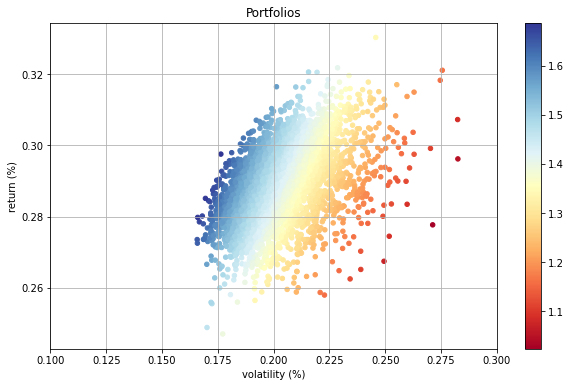

In [153]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) 

im = ax.scatter(portfolios["volatility"], portfolios["return"], c=portfolios["sharpe ratio"], s=20, edgecolor=None, cmap='RdYlBu')
ax.set_title("Portfolios")
ax.set_ylabel("return (%)")
ax.grid()


ax.set_xlim([0.10,0.30])
ax.set_xlabel("volatility (%)")

fig.colorbar(im, ax=ax)
plt.show()

In [154]:
# یافتن پرتفو با پایین ترین ریسک
low_vol_portfolio = portfolios.iloc[ portfolios["volatility"].idxmin() ]
print(36 * "-")
print("Global Minimum Volatility portfolio:")
print(36 * "-")
print("- return      : {:.2f}%".format(low_vol_portfolio[0]*100) )
print("- volatility  : {:.2f}%".format(low_vol_portfolio[1]*100) )
print("- sharpe ratio: {:.2f}".format(low_vol_portfolio[2]) )

# یافتن پرتفو با بالا ترین نسبت شارپ
high_sharpe_portfolio = portfolios.iloc[ portfolios['sharpe ratio'].idxmax() ]
print(36 * "-")
print("Maximum Sharpe Ratio portfolio:")
print(36 * "-")
print("- return      : {:.2f}%".format(high_sharpe_portfolio[0]*100) )
print("- volatility  : {:.2f}%".format(high_sharpe_portfolio[1]*100) )
print("- sharpe ratio: {:.2f}".format(high_sharpe_portfolio[2]) )

------------------------------------
Global Minimum Volatility portfolio:
------------------------------------
- return      : 27.35%
- volatility  : 16.57%
- sharpe ratio: 1.65
------------------------------------
Maximum Sharpe Ratio portfolio:
------------------------------------
- return      : 29.76%
- volatility  : 17.63%
- sharpe ratio: 1.69


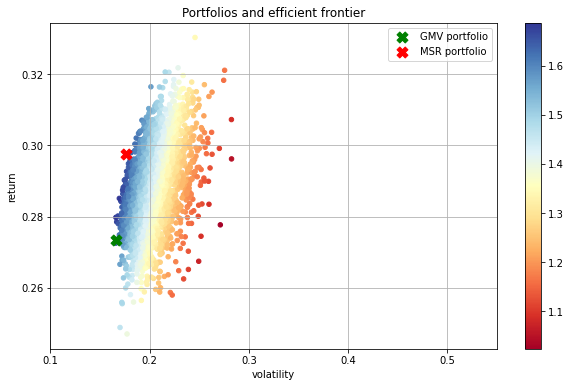

In [155]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) 

im = ax.scatter(portfolios["volatility"], portfolios["return"], c=portfolios["sharpe ratio"], s=20, edgecolor=None, label=None, cmap='RdYlBu')
ax.set_title("Portfolios and efficient frontier")
ax.set_xlabel("volatility")
ax.set_ylabel("return")
ax.grid()

# مشخص کردن دو نقطه حساس ما در نمودار
ax.scatter(low_vol_portfolio[1],     low_vol_portfolio[0],     marker="X", color='g', s=120, label="GMV portfolio")
ax.scatter(high_sharpe_portfolio[1], high_sharpe_portfolio[0], marker="X", color='r', s=120, label="MSR portfolio")

ax.set_xlim([0.10,0.55])
ax.legend()

fig.colorbar(im, ax=ax)
plt.show()

In [156]:
#  کل بازده (سالانه) شرکت هایی را که در آنها سرمایه گذاری می کنیم ببینیم
ann_rets = msj.annualize_rets(daily_rets, periods_per_year)
ann_rets

IRI/USD    0.200989
folad      0.306013
shapna     0.357875
khodro     0.273342
khesapa    0.249442
famili     0.289077
ghegol     0.382727
mellat     0.258291
setran     0.240537
shafan     0.327870
dtype: float64

اکنون می‌توانیم حداقل کننده خود را فرا بخوانیم که مشکل کمینه‌سازی یافتن وزن پرتفوی با حداقل نوسان را حل می‌کند.

In [158]:
optimal_weights = msj.minimize_volatility(ann_rets, cov_rets)
print("optimal weights:")
print(18 * "-")
print("  folad : {:.2f}%".format(optimal_weights[0]*100))
print("  shapna :   {:.2f}%".format(optimal_weights[1]*100))
print("  khodro : {:.2f}%".format(optimal_weights[2]*100))
print("  khesapa : {:.2f}%".format(optimal_weights[3]*100))
print("  famili :   {:.2f}%".format(optimal_weights[4]*100))
print("  ghegol : {:.2f}%".format(optimal_weights[5]*100))
print("  mellat : {:.2f}%".format(optimal_weights[6]*100))
print("  setran :   {:.2f}%".format(optimal_weights[7]*100))
print("  shafan : {:.2f}%".format(optimal_weights[8]*100))
print("  IRI/USD : {:.2f}%".format(optimal_weights[9]*100))


optimal weights:
------------------
  folad : 35.45%
  shapna :   10.09%
  khodro : 1.04%
  khesapa : 4.18%
  famili :   2.56%
  ghegol : 7.14%
  mellat : 5.56%
  setran :   11.47%
  shafan : 8.59%
  IRI/USD : 13.92%


In [159]:
portfolios.iloc[portfolios["volatility"].argmin()]

return          0.273518
volatility      0.165732
sharpe ratio    1.650363
w1              0.223586
w2              0.069803
w3              0.058134
w4              0.022008
w5              0.022552
w6              0.140961
w7              0.063558
w8              0.142074
w9              0.130147
w10             0.127177
Name: 1813, dtype: object

In [160]:
def get_portfolio_features(weights, rets, covmat, risk_free_rate, periods_per_year):
    # portfolio volatility
    vol = msj.portfolio_vol(weights, covmat)
    vol = msj.annualize_vol(vol, periods_per_year)

    # portfolio return
    ret = msj.portfolio_return(weights, rets)

    # portfolio sharpe ratio
    shp = msj.sharpe_ratio(ret, risk_free_rate, periods_per_year, v=vol)

    print("Portfolio return:       {:.2f}%" .format(ret*100))
    print("Portfolio volatility:   {:.2f}%" .format(vol*100))
    print("Portfolio sharpe ratio: {:.2f}" .format(shp))
    
    return ret, vol, shp

Portfolio return:       26.15%
Portfolio volatility:   15.62%
Portfolio sharpe ratio: 1.67


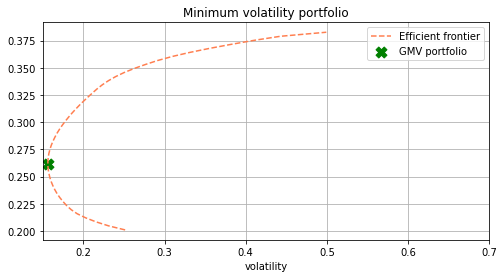

In [161]:
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

# Draw the efficient frontier
fig, ax = plt.subplots(1,1, figsize=(8,4)) 
df = msj.efficient_frontier(50, daily_rets, cov_rets, periods_per_year)
df.plot.line(x="volatility", y="return", style="--", color="coral", ax=ax, grid=True, label="Efficient frontier")
ax.scatter(vol, ret,  marker="X", color='g', s=120, label="GMV portfolio")
ax.set_xlim([0.15,0.70])
ax.legend()
ax.set_title("Minimum volatility portfolio")
plt.show()

#### یافتن پرتفوی بهینه: با به حداقل رساندن نوسانات با بازده ثابت

اگر بخواهیم پورتفولیو (در مرز کارا) با حداقل نوسان برای یک سطح بازده معین پیدا کنیم، چه؟

در این مورد، ما به سادگی باید یک محدودیت در مسئله کمینه سازی اضافه کنیم:
$$
\text{minimize} \;\; \frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w}, 
$$
subject to 
$$
\begin{cases}
\mathbf{w}^T \mathbf{R} = R_0, \\
\mathbf{w}^T \mathbf{1} = 1, \\
0 \leq \mathbf{w} \leq 1.
\end{cases}
$$
$R_0$ ===> سطح ثابتی از بازده می باشد

به عنوان مثال فرض کنید که ما بازده ثابت 53 درصد مد نظرمان است

In [54]:
target_return = 0.50

اکنون ما با فراخواندن تابع حداقل کننده می آییم مسئله را با محدودیت جدید حل میکنیم

In [55]:
optimal_weights = msj.minimize_volatility(ann_rets, cov_rets, target_return)
print("optimal weights:")
print(22*"-")
print("  folad : {:.2f}%".format(optimal_weights[0]*100))
print("  shapna :   {:.2f}%".format(optimal_weights[1]*100))
print("  khodro : {:.2f}%".format(optimal_weights[2]*100))
print("  khesapa : {:.2f}%".format(optimal_weights[3]*100))
print("  famili :   {:.2f}%".format(optimal_weights[4]*100))
print("  ghegol : {:.2f}%".format(optimal_weights[5]*100))
print("  mellat : {:.2f}%".format(optimal_weights[6]*100))
print("  setran :   {:.2f}%".format(optimal_weights[7]*100))
print("  shafan : {:.2f}%".format(optimal_weights[8]*100))

optimal weights:
----------------------
  folad : 17.92%
  shapna :   2.75%
  khodro : 6.89%
  khesapa : 2.36%
  famili :   11.12%
  ghegol : 12.62%
  mellat : 13.87%
  setran :   9.19%
  shafan : 23.28%


اجازه دهید نوسانات پورتفولیوی ساخته شده با این وزن ها را محاسبه کنیم.


In [56]:
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

Portfolio return:       50.00%
Portfolio volatility:   23.60%
Portfolio sharpe ratio: 2.12


In [58]:
optimal_weights = msj.maximize_sharpe_ratio(ann_rets, cov_rets, risk_free_rate, periods_per_year)
print("optimal weights:")
print(22*"-")
print("  folad : {:.2f}%".format(optimal_weights[0]*100))
print("  shapna :   {:.2f}%".format(optimal_weights[1]*100))
print("  khodro : {:.2f}%".format(optimal_weights[2]*100))
print("  khesapa : {:.2f}%".format(optimal_weights[3]*100))
print("  famili :   {:.2f}%".format(optimal_weights[4]*100))
print("  ghegol : {:.2f}%".format(optimal_weights[5]*100))
print("  mellat : {:.2f}%".format(optimal_weights[6]*100))
print("  setran :   {:.2f}%".format(optimal_weights[7]*100))
print("  shafan : {:.2f}%".format(optimal_weights[8]*100))

optimal weights:
----------------------
  folad : 21.63%
  shapna :   3.59%
  khodro : 6.78%
  khesapa : 1.17%
  famili :   7.91%
  ghegol : 15.22%
  mellat : 11.85%
  setran :   6.46%
  shafan : 25.38%


In [59]:
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

Portfolio return:       51.21%
Portfolio volatility:   24.02%
Portfolio sharpe ratio: 2.13


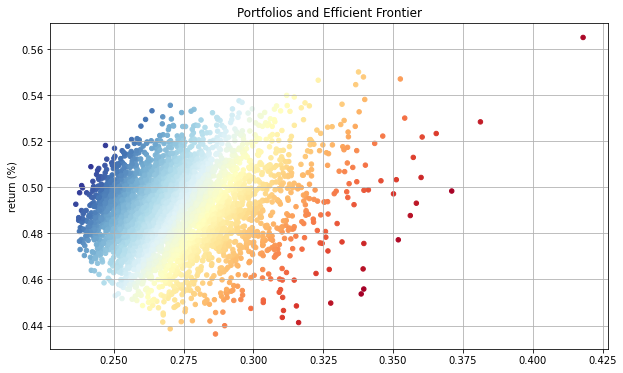

In [60]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) 

im = ax.scatter(portfolios["volatility"], portfolios["return"], c=portfolios["sharpe ratio"], s=20, edgecolor=None, cmap='RdYlBu')
ax.set_title("Portfolios and Efficient Frontier")
ax.set_ylabel("return (%)")
ax.grid()


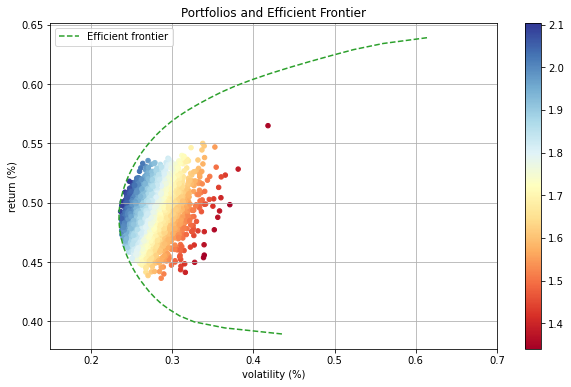

In [62]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) 

im = ax.scatter(portfolios["volatility"], portfolios["return"], c=portfolios["sharpe ratio"], s=20, edgecolor=None, cmap='RdYlBu')
ax.set_title("Portfolios and Efficient Frontier")
ax.set_ylabel("return (%)")
ax.grid()

# رسم مرز کارا
df = msj.efficient_frontier(50, daily_rets, cov_rets, periods_per_year)
df.plot.line(x="volatility", y="return", style="--", color="tab:green", ax=ax, grid=True, label="Efficient frontier")
ax.set_xlim([0.15,0.70])
ax.set_xlabel("volatility (%)")

fig.colorbar(im, ax=ax)
plt.show()

Portfolio return:       51.21%
Portfolio volatility:   24.02%
Portfolio sharpe ratio: 2.13


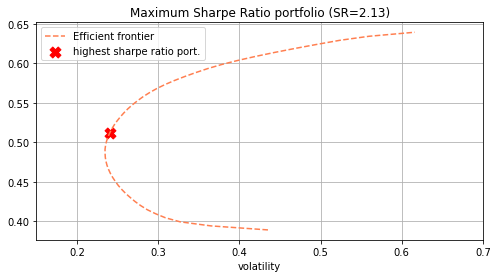

In [64]:
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

# رسم مرز کارا
fig, ax = plt.subplots(1,1, figsize=(8,4)) 
df = msj.efficient_frontier(50, daily_rets, cov_rets, periods_per_year)
df.plot.line(x="volatility", y="return", style="--", color="coral", ax=ax, grid=True, label="Efficient frontier")
ax.scatter(vol, ret,  marker="X", color='r', s=120, label="highest sharpe ratio port.")
ax.set_xlim([0.15,0.70])
ax.legend()
ax.set_title("Maximum Sharpe Ratio portfolio (SR={:.2f})".format(shp))
plt.show()

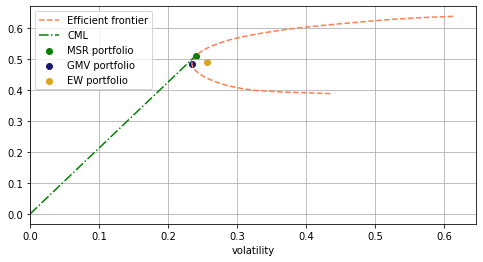

In [65]:
df = msj.efficient_frontier(50, daily_rets, cov_rets, periods_per_year , iplot = True , hsr = True , cml = True , mvp = True , ewp = True)

### به حداکثر رساندن پرتفوی نسبت شارپ در حضور نرخ بدون ریسک غیر صفر


In [67]:
risk_free_rate = 0.25
optimal_weights = msj.maximize_sharpe_ratio(ann_rets, cov_rets, risk_free_rate, periods_per_year)
print("optimal weights:")
print("  folad : {:.2f}%".format(optimal_weights[0]*100))
print("  shapna :   {:.2f}%".format(optimal_weights[1]*100))
print("  khodro : {:.2f}%".format(optimal_weights[2]*100))
print("  khesapa : {:.2f}%".format(optimal_weights[3]*100))
print("  famili :   {:.2f}%".format(optimal_weights[4]*100))
print("  ghegol : {:.2f}%".format(optimal_weights[5]*100))
print("  mellat : {:.2f}%".format(optimal_weights[6]*100))
print("  setran :   {:.2f}%".format(optimal_weights[7]*100))
print("  shafan : {:.2f}%".format(optimal_weights[8]*100))

optimal weights:
  folad : 25.75%
  shapna :   5.37%
  khodro : 6.49%
  khesapa : 0.00%
  famili :   4.57%
  ghegol : 20.41%
  mellat : 6.90%
  setran :   0.00%
  shafan : 30.52%


In [68]:
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

Portfolio return:       53.65%
Portfolio volatility:   25.68%
Portfolio sharpe ratio: 1.12


اجازه دهید مرز کارا و خط بازار سرمایه را با استفاده از مولفه های بهینه  در نمودار خود رسم کنیم:

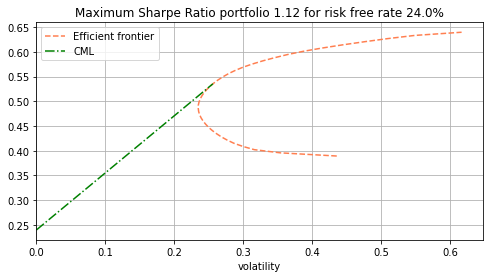

In [72]:
df, ax = msj.efficient_frontier(40, daily_rets, cov_rets, periods_per_year, risk_free_rate=risk_free_rate, 
                                iplot=True, cml=True)
ax.set_title("Maximum Sharpe Ratio portfolio {} for risk free rate {}%".format(np.round(shp,2),risk_free_rate*100))
plt.show()

معرفی دارایی بدون ریسک به عنوان یکی از اجزای جدید پرتفوی، دامنه ترکیبات نوسان-بازده موجود را بهبود بخشیده است، زیرا در همه جا، به جز در پرتفوی مماس،  بازدهی بالاتری نسبت به مرز کارا (قدیمی) در همه سطوح نوسانات ارائه می دهد.

efficient frontier method ====> توجه داشته باشید که این تابع دارای پارامتر اختیاری دیگری برای ترسیم پرتفوی با بالاترین نسبت شارپ، پرتفوی با حداقل نوسانات و همچنین پرتفوی با وزن یکسان است :

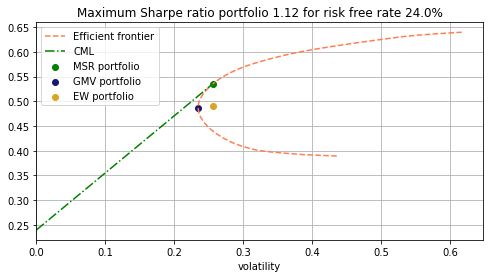

In [73]:
risk_free_rate = 0.24
df, ax = msj.efficient_frontier(90, daily_rets, cov_rets, periods_per_year, risk_free_rate=risk_free_rate, 
                                iplot=True, hsr=True, cml=True, mvp=True, ewp=True)
ax.set_title("Maximum Sharpe ratio portfolio {} for risk free rate {}%".format(np.round(shp,2),risk_free_rate*100))
plt.show()

In [77]:
invcov = msj.inverse_df(cov_rets)
ones   = np.repeat(1,9) 
r_rf   = ann_rets - risk_free_rate*ones

In [78]:
w_M = np.dot( invcov, r_rf ) / np.dot( ones, np.dot(invcov, r_rf) )
w_M

array([ 0.2564327 ,  0.052927  ,  0.07096179, -0.01157816,  0.05055408,
        0.20165252,  0.0762831 , -0.00061915,  0.30338612])

In [79]:
msj.weigths_max_sharpe_ratio(cov_rets, r_rf)

folad      0.256433
shapna     0.052927
khodro     0.070962
khesapa   -0.011578
famili     0.050554
ghegol     0.201653
mellat     0.076283
setran    -0.000619
shafan     0.303386
dtype: float64

In [80]:
msj.weigths_max_sharpe_ratio(cov_rets, r_rf).values

array([ 0.2564327 ,  0.052927  ,  0.07096179, -0.01157816,  0.05055408,
        0.20165252,  0.0762831 , -0.00061915,  0.30338612])

$\mu_M$ and $\sigma_M$ ====> حال، اجازه دهید بررسی کنیم که پرتفوی با این وزن ها مانند فرمول ها دارای بازده و نوسان است.

In [81]:
# محاسبه بازده با استفاده از روش بازده پرتفو
mu_M = msj.portfolio_return(w_M, ann_rets)
mu_M 

0.5361854593827081

In [82]:
# volatility: portfolio vol method
sigma_M = msj.annualize_vol( msj.portfolio_vol(w_M, cov_rets), periods_per_year)
sigma_M

0.25643100963352605

$$
\mathbf{w}^* 
= \underbrace{ \frac{R_0-R_f}{(\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})} }_{:= r} \Sigma^{-1}(\mathbf{R} - R_f\mathbf{1})
= r \Sigma^{-1}(\mathbf{R} - R_f\mathbf{1}).
$$

In [83]:
target_ret = 0.40
wstar = (target_ret - risk_free_rate) / np.dot(r_rf, np.dot(invcov,r_rf)) * np.dot(invcov,r_rf)             
wstar

array([ 0.13852548,  0.02859128,  0.0383337 , -0.00625455,  0.02730942,
        0.10893311,  0.04120829, -0.00033447,  0.16388981])

In [84]:
np.append( wstar, 1-wstar.sum() )

array([ 1.38525478e-01,  2.85912756e-02,  3.83337049e-02, -6.25454672e-03,
        2.73094205e-02,  1.08933111e-01,  4.12082888e-02, -3.34465491e-04,
        1.63889810e-01,  4.59797924e-01])

آخرین وزن در دارایی بدون ریسک است.
